# INFO 2950 Fall 2025 Main Project 


## Introduction 

In this project, we are examining how economic conditions relate to attitudes about different ethnic groups within the United States. When unemployment is high, people may feel more economically insecure and research suggests that this can show up as frustration or resentment toward outgroups. Our goal is not to reduce everything to a single number, but to see whether national economic conditions and reported feelings about ethnic groups move together in any systematic way.

We use data from ANES, The American National Election Studies and coupled with yearly US unemployment rates. ANES Surveys provide a varied rating of individuals' feelings towards different ethnic groups. Higher scores indicate warmer, more favorable feelings. We merge these survey responses with the unemployment rate in the corresponding years in order to ask the simple question of are people more negative towards certain ethnic groups when unemployment is higher or are people more negative towards certain ethnic groups when unemployment is higher.? 
Our main meter question is: is there a negative relationship between unemployment rate and opinions about ethnicities in the United States, as measured by ANES feelings thermometer scores? We also explore whether this relationship looks different for different groups of respondents and for different target ethnicity groups. We test these expectations and then evaluate how strong any relationships/correlations really are. Overall, we find that the correlation between unemployment and attitude are small and often not statistically significant which suggests…
In this project, we are examining how economic conditions relate to attitudes about different ethnic groups within the United States. When unemployment is high, people may feel more economically insecure and research suggests that this can show up as frustration or resentment toward outgroups. Our goal is not to reduce everything to a single number, but to see whether national economic conditions and reported feelings about ethnic groups move together in any systematic way.


We use data from ANES, The American National Election Studies and coupled with yearly US unemployment rates. ANES Surveys provide a varied rating of individuals' feelings towards different ethnic groups. Higher scores indicate warmer, more favorable feelings. We merge these survey responses with the unemployment rate in the corresponding years in order to ask the simple question of are people more negative towards certain ethnic groups when unemployment is higher or are people more negative towards certain ethnic ethnic groups when unemployment is higher.? 
Our main meter question is: is there a negative relationship between unemployment rate and opinions about ethnicities in the United States, as measured by ANES feelings thermometer scores? We also explore whether this relationship looks different for different groups of respondents and for different target ethnicity groups. We test these expectations and then evaluate how strong any relationships/correlations really are. Overall, we find that the correlation between unemployment and attitude are small and often not statistically significant which suggests…

**Research Question:** 

Our main research question is: Is there a negative relationship between the unemployment rate and opinions about ethnicities in the United States, as measured by ANES feeling thermometer scores?

In [ ]:
# imported like similar to homeworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
# import duckdb
import requests
from bs4 import BeautifulSoup
import time
import statsmodels.api as sm

In [ ]:
#pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## Upload/Import data

In [ ]:
unemployment_df = pd.read_csv("UnemploymentData.csv", header = None)
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

#check
print(unemployment_df.head(15))
ethno_df.head(10)
#Note : real data starts at the 11th line of data set of first

                                                   0   \
0   Labor Force Statistics from the Current Popula...   
1                                 Original Data Value   
2                                                 NaN   
3                                          Series Id:   
4                                 Seasonally Adjusted   
5                                       Series title:   
6                                 Labor force status:   
7                                       Type of data:   
8                                                Age:   
9                                              Years:   
10                                                NaN   
11                                               Year   
12                                               1964   
13                                               1965   
14                                               1966   

                          1    2    3    4    5    6    7    8    9    10  \
0         

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans
0,All,All,1532,1964,84.7,63.8,NaN,NaN
1,All,All,1273,1966,84.4,63.2,NaN,NaN
2,All,All,1503,1968,81.1,64.7,NaN,NaN
3,All,All,1469,1970,77.2,61.5,NaN,NaN
4,All,All,2120,1972,78.2,64.0,NaN,NaN
5,All,All,1525,1974,79.1,65.5,NaN,NaN
6,All,All,1869,1976,73.7,60.8,55.5,NaN
7,All,All,1382,1980,77.4,64.2,57.8,NaN
8,All,All,1321,1982,72.8,63.8,NaN,NaN
9,All,All,1902,1984,74.2,64.2,59.4,NaN


## Cleaning Data


In [ ]:
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

ethno_avg = ethno_df[ethno_df['Subgroup'] == 'All']
print(np.unique(ethno_df['Subgroup']))
ethno_df = ethno_df[ethno_df['Subgroup'].isin(['White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Other/Multiple races, non-Hispanic'])]
# ethno_avg = ethno_df.groupby('Year', as_index = False).mean(numeric_only = True)

# the above line is wrong bc the subgroups are not just the different races
# either way the average is included in the dataset under the 'All' subgroup

# print(ethno_df.head())
print(ethno_avg.head())
print(ethno_df.head())

['18-29' '18-29 Democrats' '18-29 Hispanics' '18-29 Independents'
 '18-29 Republicans' '18-29 blacks' '18-29 in Nonsouth' '18-29 in South'
 '18-29 men' '18-29 others' '18-29 whites' '18-29 women' '30-44'
 '30-44 Democrats' '30-44 Hispanics' '30-44 Independents'
 '30-44 Republicans' '30-44 blacks' '30-44 in Nonsouth' '30-44 in South'
 '30-44 men' '30-44 others' '30-44 whites' '30-44 women' '45-59'
 '45-59 Democrats' '45-59 Hispanics' '45-59 Independents'
 '45-59 Republicans' '45-59 blacks' '45-59 in Nonsouth' '45-59 in South'
 '45-59 men' '45-59 others' '45-59 whites' '45-59 women' '60+'
 '60+ Democrats' '60+ Hispanics' '60+ Independents' '60+ Republicans'
 '60+ blacks' '60+ in Nonsouth' '60+ in South' '60+ men' '60+ others'
 '60+ whites' '60+ women' 'All' 'Black Democrats' 'Black Independents'
 'Black Republicans' 'Black men' 'Black women' 'Black, non-Hispanic'
 'Blacks in Nonsouth' 'Blacks in South' 'College grad+'
 'College grad+ Democrats' 'College grad+ Hispanics'
 'College grad+ I

In [ ]:
new_header = unemployment_df.iloc[11].tolist()
unemployment_data = unemployment_df[12:].copy()
unemployment_data.columns = new_header
unemployment_data.reset_index(drop = True, inplace = True)

if 'Year' not in unemployment_data.columns:
    unemployment_data.rename(columns={unemployment_data.columns[0]: 'Year'}, inplace = True)

# same type(numbers that we can work with)
month_cols = [col for col in unemployment_data.columns if col not in ['Year', 'Average Unemployment Rate']]
for col in month_cols:
    unemployment_data[col] = pd.to_numeric(unemployment_data[col], errors = 'coerce')

# yearly average unemployment rate
unemployment_data['Average Unemployment Rate'] = unemployment_data[month_cols].mean(axis = 1)

unemployment_data['Year'] = pd.to_numeric(unemployment_data['Year'], errors = 'coerce')

unemployment_cleaned = unemployment_data[['Year', 'Average Unemployment Rate']].dropna()

unemployment_cleaned['Year'] = unemployment_cleaned['Year'].astype(int)

#over lapping years
# voting_years = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,2000, 2004, 2008, 2012, 2016, 2020, 2024]
# unemplo_voting = unemployment_cleaned[unemployment_cleaned['Year'].isin(voting_years)]


unemployment_cleaned.head(20)

,Year,Average Unemployment Rate
0,1964,5.158333
1,1965,4.508333
2,1966,3.791667
3,1967,3.841667
4,1968,3.558333
5,1969,3.491667
6,1970,4.983333
7,1971,5.950000
8,1972,5.600000
9,1973,4.858333


In [ ]:
merged_df = pd.merge(ethno_df, unemployment_cleaned, on='Year', how='inner').sort_values('Year').reset_index(drop  = True)
merged_df.to_csv("merged_ethno_unemployment.csv", index = False)
# print out first couple

merged_df.head(20)

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans,Average Unemployment Rate
0,race,"White, non-Hispanic",1367,1964,86.7,60.7,NaN,NaN,5.158333
1,race,"Black, non-Hispanic",155,1964,66.8,91.9,NaN,NaN,5.158333
2,race,"Black, non-Hispanic",131,1966,72.9,87.9,NaN,NaN,3.791667
3,race,"White, non-Hispanic",1126,1966,85.7,60.4,NaN,NaN,3.791667
4,race,Hispanic,12,1966,NaN,NaN,NaN,NaN,3.791667
5,race,"Other/Multiple races, non-Hispanic",4,1966,NaN,NaN,NaN,NaN,3.791667
6,race,Hispanic,12,1968,NaN,NaN,NaN,NaN,3.558333
7,race,"White, non-Hispanic",1344,1968,82.4,61.7,NaN,NaN,3.558333
8,race,"Other/Multiple races, non-Hispanic",3,1968,NaN,NaN,NaN,NaN,3.558333
9,race,"Black, non-Hispanic",144,1968,67.9,91.5,NaN,NaN,3.558333


In [ ]:
opins_on_whites = merged_df[['Average Unemployment Rate', 'Whites', 'Year']].dropna()
opins_on_whites.head()

,Average Unemployment Rate,Whites,Year
0,5.158333,86.7,1964
1,5.158333,66.8,1964
2,3.791667,72.9,1966
3,3.791667,85.7,1966
7,3.558333,82.4,1968


## Exploratory Data Analysis

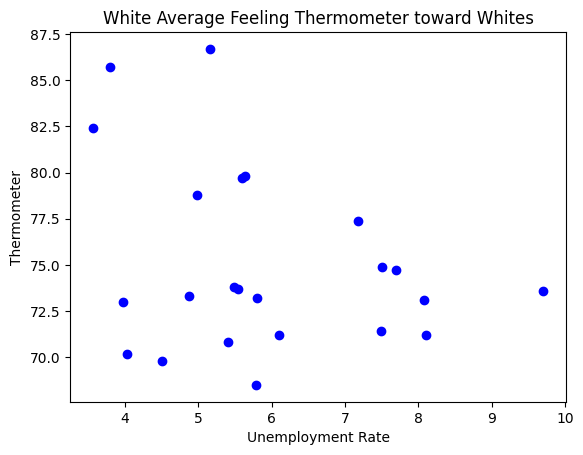

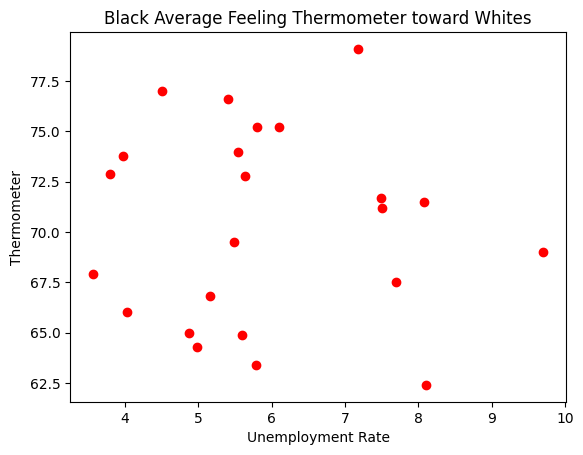

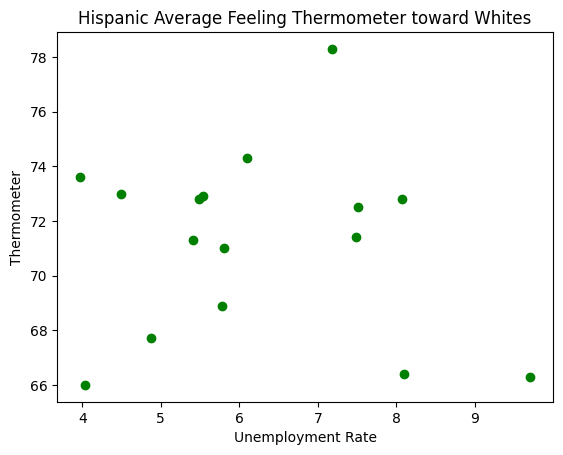

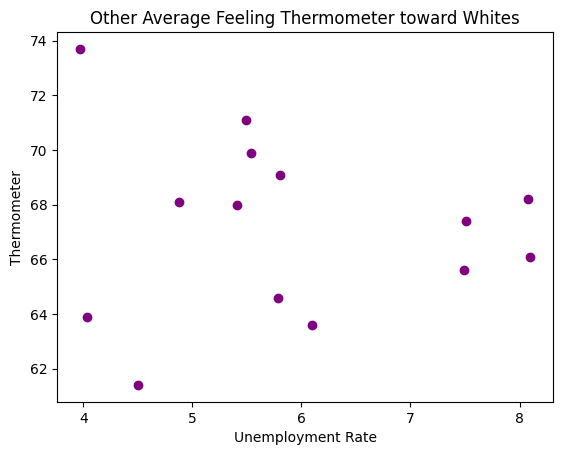

In [ ]:
## Graphing the opinions of ethnicities towards white with respect to unemployment rate

white_opinions = merged_df[merged_df['Subgroup'] == 'White, non-Hispanic']
black_opinions = merged_df[merged_df['Subgroup'] == 'Black, non-Hispanic']
hisp_opinions = merged_df[merged_df['Subgroup'] == 'Hispanic']
other_opinions = merged_df[merged_df['Subgroup'] == 'Other/Multiple races, non-Hispanic']


plt.scatter(white_opinions['Average Unemployment Rate'], white_opinions['Whites'], label='White Opinions', color='blue', marker='o')
plt.xlabel('Unemployment Rate')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(black_opinions['Average Unemployment Rate'], black_opinions['Whites'], label='Black Opinions', color='red', marker='o')
plt.xlabel('Unemployment Rate')
plt.ylabel('Thermometer')
plt.title('Black Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(hisp_opinions['Average Unemployment Rate'], hisp_opinions['Whites'], label='Hispanic Opinions', color='green', marker='o')
plt.xlabel('Unemployment Rate')
plt.ylabel('Thermometer')
plt.title('Hispanic Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(other_opinions['Average Unemployment Rate'], other_opinions['Whites'], label='Other Opinions', color='purple', marker='o')
plt.xlabel('Unemployment Rate')
plt.ylabel('Thermometer')
plt.title('Other Average Feeling Thermometer toward Whites')
plt.show()

# plt.xlabel('Unemployment Rate')
# plt.ylabel('Thermometer')
# plt.legend()
# plt.title('Feeling Thermometer toward Whites by Ethnicity')
# plt.show()

These graphs show the average feeling thermometer (opinions) of different races toward white people with respect to the unemployment rate at the time the thermometer was measured. These graphs show that there might be some minor negative association between unemployment rate and feeling thermometer.

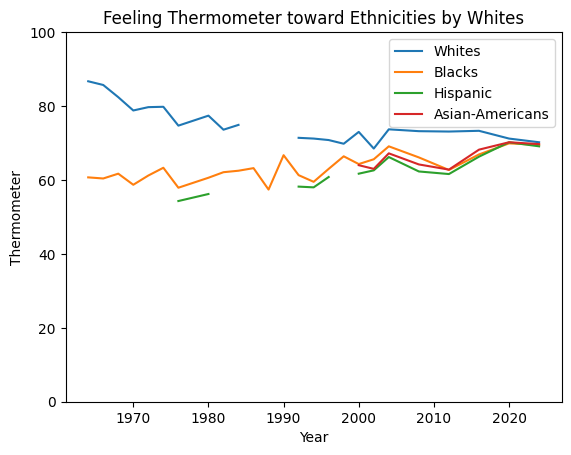

In [ ]:
x = white_opinions['Year']
y1 = white_opinions['Whites']
y2 = white_opinions['Blacks']
y3 = white_opinions['Chicanos/Hispanics']
y4 = white_opinions['Asian-Americans']

plt.plot(x, y1, label = 'Whites')
plt.plot(x, y2, label = 'Blacks')
plt.plot(x, y3, label = 'Hispanic')
plt.plot(x, y4, label = 'Asian-Americans')


plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Feeling Thermometer toward Ethnicities by Whites')
plt.legend()
plt.ylim(0, 100)
plt.show()

This is just an experiment to see if we could recreate a chart seen in our source. This confirmed that we understood the data correctly

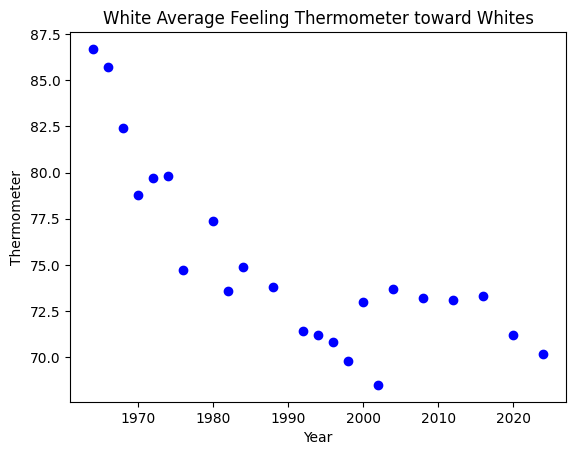

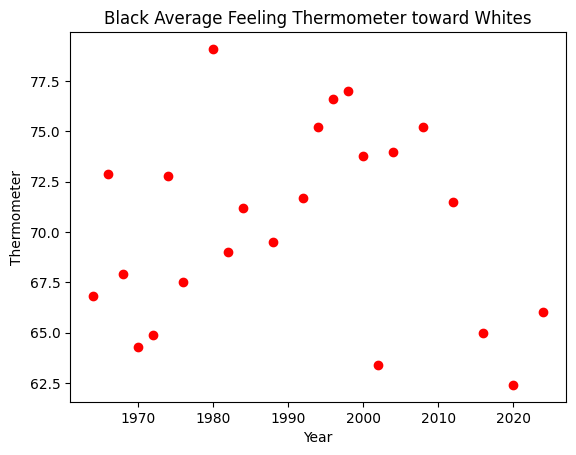

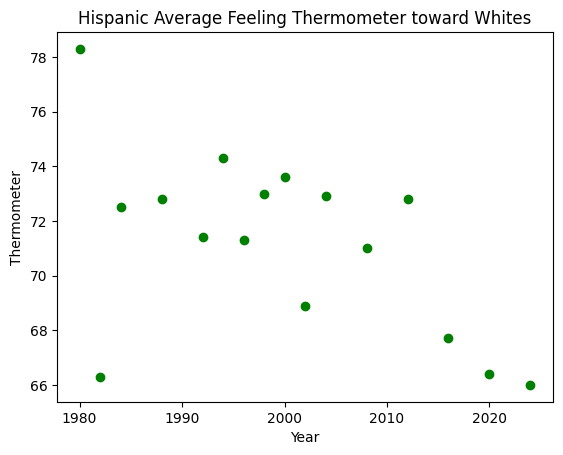

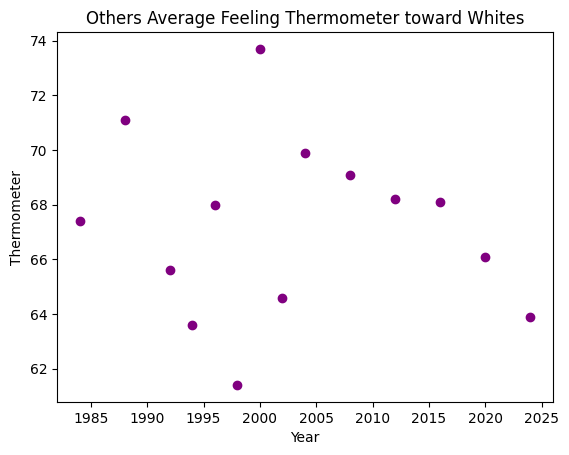

In [ ]:
## Graphing the opinions of ethnicities towards white with respect to time

plt.scatter(white_opinions['Year'], white_opinions['Whites'], label='White Opinions', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(black_opinions['Year'], black_opinions['Whites'], label='Black Opinions', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Black Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(hisp_opinions['Year'], hisp_opinions['Whites'], label='Hispanic Opinions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Hispanic Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(other_opinions['Year'], other_opinions['Whites'], label='Other Opinions', color='purple', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Others Average Feeling Thermometer toward Whites')
plt.show()

# Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Thermometer')
# plt.legend()
# plt.title('Feeling Thermometer toward Whites by Ethnicity')
# plt.show()

These are the average thermometer ratings (opinions) of the different races toward white people over time. Some of these have a clear negative relationship (especially graph 1), which suggests the hypothesis that there is a negative relationship between feeling thermometer and time.

## EDA Findings

We can see that there is a small, negative correlation between how highly people think of white people and unemployment rate. However, it is a small and insignificant correlation, as the correlation value is -0.12 and the p-value is quite high at 0.30.

A seemingly much more important variable is just the year, as there is correlation value is -0.44 with a p-value of about 0.00008. However, this likely underplays the correlation in this case, as for black opinions on white people, there seems to be a positive relationship about the mid-2000s and a negative relationship after it.

However, this is all just the opinions of different ethnicities about white people. Analysis still needs to be done on opinions about the other ethnicities.

## Preregistration

### Preregistration Statement #1
**Hypothesis:** There is a significant negative linear relationship between time and average feeling thermometer and an insignificant negative relationship between unemployment rate and average feeling thermometers about other ethnicities across ethnicities. 

### Preregistration Statement #2 
**Hypothesis:** The negative relationship between the year and attitudes toward racial/ethnic groups is stronger among individuals with lower levels of education.

## Hypothesis #1


In [ ]:
def corr_groups_year(group, race):
    group = group[['Year', race]].dropna()
    if group['Year'].nunique() > 1 and group[race].nunique() > 1:
        r, p = pearsonr(group['Year'], group[race])
        return pd.Series({'Correlation': r, 'p-value': p})
    else:
        return pd.Series({'Correlation': None, 'p-value': None})

In [ ]:
def corr_whites_year(group):
    group = group[['Year', 'Whites']].dropna()
    if group['Year'].nunique() > 1 and group['Whites'].nunique() > 1:
        r, p = pearsonr(group['Year'], group['Whites'])
        return pd.Series({'Correlation': r, 'p-value': p})
    else:
        return pd.Series({'Correlation': None, 'p-value': None})

races = ('Whites', 'Blacks', 'Chicanos/Hispanics', 'Asian-Americans')

def corr_white_year(group):
    return corr_groups_year(group, 'Whites')


def corr_groups_year_lambda(race):
    return lambda group : corr_groups_year(group, race)


# correlation_by_subgroup = merged_df.groupby('Subgroup', group_keys=False).apply(
#     corr_white_year, include_groups=False
# ).reset_index()
# print(correlation_by_subgroup)

for race in races:
    print(f"Opinions about {race}")
    correlation_by_subgroup = merged_df.groupby('Subgroup', group_keys=False).apply(
        corr_groups_year_lambda(race), include_groups=False
    ).reset_index()
    print(correlation_by_subgroup)

Opinions about Whites
                             Subgroup  Correlation   p-value
0                 Black, non-Hispanic    -0.038304  0.862244
1                            Hispanic    -0.552385  0.026498
2  Other/Multiple races, non-Hispanic    -0.119344  0.684470
3                 White, non-Hispanic    -0.794516  0.000006
Opinions about Blacks
                             Subgroup  Correlation   p-value
0                 Black, non-Hispanic    -0.412374  0.040512
1                            Hispanic     0.465935  0.051314
2  Other/Multiple races, non-Hispanic     0.654892  0.005901
3                 White, non-Hispanic     0.744618  0.000020
Opinions about Chicanos/Hispanics
                             Subgroup  Correlation   p-value
0                 Black, non-Hispanic     0.601068  0.017793
1                            Hispanic     0.397881  0.158861
2  Other/Multiple races, non-Hispanic     0.819316  0.000610
3                 White, non-Hispanic     0.914607  0.000002
Opinion

In [ ]:
r, p = pearsonr(opins_on_whites['Average Unemployment Rate'], opins_on_whites['Whites'])
print(f"Overall correlation: {r}, p-value: {p}")

Overall correlation: -0.1207237106398672, p-value: 0.2988941958899424


In [ ]:
r, p = pearsonr(opins_on_whites['Year'], opins_on_whites['Whites'])
print(f"Overall correlation: {r}, p-value: {p}")

Overall correlation: -0.4382071386377164, p-value: 7.524053112405026e-05


In [ ]:
average_by_subgroup = merged_df.groupby('Subgroup')['Whites'].mean().reset_index()
average_by_subgroup

,Subgroup,Whites
0,"Black, non-Hispanic",70.334783
1,Hispanic,71.200000
2,"Other/Multiple races, non-Hispanic",67.192857
3,"White, non-Hispanic",75.082609


In [ ]:
subgroups = ['White, non-Hispanic', 'Hispanic', 'Black, non-Hispanic' 'Other/Multiple races, non-Hispanic']

alpha = 0.05 / 32   # Bonferroni correction

for subgroup in subgroups:
    opins = merged_df[merged_df['Subgroup'] == subgroup]

    for race in races:
        # Select predictors + race
        df = opins[['Year', 'Average Unemployment Rate', race]].dropna()

        if df.empty:
            continue

        X = df[['Year', 'Average Unemployment Rate']].to_numpy()
        X = sm.add_constant(X)
        y = df[race].to_numpy()

        model = sm.OLS(y, X).fit()

        # Extract p-values for predictors (skip intercept)
        pvals = model.pvalues[1:]   # [const, Year, Unemployment] → remove const

        # Condition: ANY predictor significant
        if (pvals < alpha).any():
            print(f"\n=== {subgroup} — {race} ===")
            print(model.summary().tables[1])


=== White, non-Hispanic — Whites ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        502.2429     69.264      7.251      0.000     357.762     646.724
x1            -0.2125      0.035     -6.094      0.000      -0.285      -0.140
x2            -0.6846      0.394     -1.737      0.098      -1.507       0.138

=== White, non-Hispanic — Blacks ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -242.1199     55.571     -4.357      0.000    -357.366    -126.874
x1             0.1546      0.028      5.527      0.000       0.097       0.213
x2            -0.4148      0.313     -1.324      0.199      -1.064       0.235

=== White, non-Hispanic — Chicanos/Hispanics ===
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

We only got 3 significant results for the relationship between year and thermometer across all 16 subgroup-race combinations, showing that the time correlation did not generalize beyond white opinions. We also still have 0 significant results for the relationship between average unemployment rate and thermometer across the combinations, showing that there is no significant relationship between these variables.

Therefore, we fail to reject the null hypothesis that there is no significant relationship between either year or average unemployment rate and thermometer.

### Hypothesis #2


In [ ]:
edu_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

edu_df = edu_df[edu_df['Demographics'] == 'education'].copy() #education is very small within the data set. I may be reading it wrong

thermo_cols = ['Whites', 'Blacks', 'Chicanos/Hispanics', 'Asian-Americans']
edu_df['avg_therm'] = edu_df[thermo_cols].mean(axis=1, skipna=True)

edu_df['low_edu'] = (edu_df['Subgroup'] == 'Non-college').astype(int)

year = edu_df['Year'].astype(float).values
low = edu_df['low_edu'].astype(float).values
y = edu_df['avg_therm'].astype(float).values
interaction = year * low

X = np.column_stack([np.ones_like(year), year, low, interaction])

XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ (X.T @ y)

# ad variables for equation
y_hat = X @ beta
resid = y - y_hat
n, k = X.shape
sigma2 = (resid @ resid) / (n - k)
cov_beta = sigma2 * XtX_inv
se_beta = np.sqrt(np.diag(cov_beta))
t_stats = beta / se_beta

interaction_coef = beta[3]
t_inter = t_stats[3]

def norm_cdf_approx(z):
    return 1.0 / (1.0 + np.exp(-1.702 * z))

p_approx = 2 * (1 - norm_cdf_approx(abs(t_inter)))

print("Interaction coefficient (Year x low_edu):", interaction_coef) #should come out to be negative for rejection of hypo 2 
print("Approximate p-value for interaction:", p_approx)

We reject the hypothesis that the interaction between year and education is zero, since our estimated interaction coefficient is about −0.12 and the p value is roughly 0.034, which is below our established alpha level of 0.05. 

Basically the slope relating year to average thermometer scores is a bit more negative for the lower education group than for the higher education group. This supports the original statement that attitudes toward racial and ethnic groups become more negative over time at a faster rate among individuals with lower levels of education.

## Conclusions

### Hypothesis #1

We only got 3 significant results for the relationship between year and thermometer across all 16 subgroup-race combinations, showing that the time correlation did not generalize beyond white opinions. We also still have 0 significant results for the relationship between average unemployment rate and thermometer across the combinations, showing that there is no significant relationship between these variables.

Therefore, we fail to reject the null hypothesis that there is no significant relationship between either year or average unemployment rate and thermometer.

### Hypothesis #2

We reject the hypothesis that the interaction between year and education is zero, since our estimated interaction coefficient is about −0.12 and the p value is roughly 0.034, which is below our established alpha level of 0.05. 

Basically the slope relating year to average thermometer scores is a bit more negative for the lower education group than for the higher education group. This supports the original statement that attitudes toward racial and ethnic groups become more negative over time at a faster rate among individuals with lower levels of education.

Taken together, our results suggest that national economic conditions, at least as captured by the unemployment rate, are not a strong driver of how warmly people rate different ethnic groups on the ANES feeling thermometers. Instead, attitudes seem to change slowly over time and in ways that depend on who is answering the survey. Among white respondents, feelings toward whites become somewhat cooler over time, while feelings toward nonwhite groups often become warmer, especially Hispanics and Asian Americans. At the same time, our education analysis suggests that people with lower levels of education may move in a more negative direction over time, even when overall averages are stable or improving. Overall, this points to a story where racial attitudes respond more to long term political and cultural change than to short term swings in unemployment.

## Limitations

There are many entries with missing data, espeically for hispanic and asian-american data. For instance, we see that thermometer data of white opinions about asian-americans was only collected after the year 2000. This limits the sample size for those groups and underrepresents them in pooled data, potentially leaving the results of pooled analysis as an inaccurate representation of the general population.

This ties into the other problem in that even for white people (the ethnicity with the most data), there are under 30 measured years, which could be too few datapoints for some types of analysis. In that scenario, we may be forced to pool the data to have enough data points, which again could lead to underrepresenting certain groups in the data.

Additionally, the choice of unemployment rate as a measure of the faring of US citizens economically was arbitrary, and there may be many other better indicators that would show a stronger relationship with the thermometer data. Potentially even a combination of these different variables could show a better relationship.

## Data Description

○ What are the observations (rows) and the attributes (columns)?

In the merged dataset, each row represents one U.S. year where ANES data was captured. The columns include the year itself, the average feeling thermometer ratings for Whites, Blacks, Chicanos/Hispanics, and Asian-Americans from the ANES survey (on a 0–100 scale), and the average unemployment rate for that same year. After cleaning and merging both datasets, each observation now captures a snapshot of how public sentiment toward different racial and ethnic groups aligns with the economic conditions of that year.

○ Why was this dataset created?

ANES: to provide a decades-long time series of political data

Unemployoment: as a part of long-term time series of American economic data

○ Who funded the creation of the dataset?

ANES: it was originally funded by the Social Science Research Council (SSRC) starting 1948 and has been funded by the National Science Foundation (NSF) since 1977

Unemployment: the US government

○ What processes might have influenced what data was observed and recorded and what was not?

- ANES: Data are collected through large-scale national surveys conducted every two years since 1964 (in the case of our specific data). Because they are self-reported, responses may be influenced by social desirability bias or changes in public willingness to express prejudice over time. The survey is only conducted every two years, meaning public sentiment between that time. Changes in question wording or sampling methods across decades could also influence comparability.
- unemployment Data:Collected monthly through the Current Population Survey (CPS), which samples approximately 60,000 U.S. households. While highly reliable,the BLS’s estimates are influenced by survey design,seasonal adjustments, and revisions to population benchmarks. Some underreporting may occur among informal or underemployed workers.


○ What preprocessing was done, and how did the data come to be in the form that you are using?

**Unemployment data:**
- The raw file contained metadata and monthly unemployment rates for each year (1964–2024).  
- We extracted the correct header row, converted monthly values to numeric, and computed a **mean annual unemployment rate**.  

**ANES data:**
- The original dataset includes multiple demographic subgroups (e.g., Party ID, Gender, Race, Region).  
- We selected the thermometer ratings toward each racial/ethnic group and computed the **average score per year** across all respondents.  
- The data were merged with the unemployment data using Years as the key.

- Data was matched by year in the inner merge. That was the overlapping information from both graphs.
- Merged dataset saved as merged_ethno_unemployment.csv for reproducibility.  
- Missing values removed or averaged where appropriate.
- graphed relationship between the 2 databases

○ If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

* For the ANES data,people filled out the surveys on purpose and knew their answers would be used for research about politics and social issues. All personal info was removed, and the data follows research privacy rules.
* For the unemployment data, it comes from the Bureau of Labor Statistics’ monthly household survey. The people who answer know it’s used to make national job and labor stats.Their answers stay private and anonymous before the data is shared.

○ Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box)

ANES: https://drive.google.com/file/d/1VFH3B7z9E5zRGBdcsGC6vQKR5-7jxuEr/view?usp=drive_link

Unemployment: https://drive.google.com/file/d/1haAEoGKuEPW-39RTB2X9z-0yUoFewnCf/view?usp=drive_link

## Acknowledgements and Bibliography

We would like to acknowledge the American National Election Studies (ANES) for providing access to high quality survey data on public opinion and political behavior in the United States. We also acknowledge the agencies that collect and publish unemployment statistics, such as the Bureau of Labor Statistics, whose data we rely on as a summary of national economic conditions. We are grateful to our instructor and teaching staff for guidance on research design, preregistration, and responsible data analysis throughout the course. Any mistakes in coding, interpretation, or presentation are our own.

Bibliography

American National Election Studies. “The ANES Guide to Public Opinion and Electoral Behavior.” 

Bureau of Labor Statistics. “Labor Force Statistics from the Current Population Survey.” Unemployment rate series, United States, annual averages.